In [1]:
%pwd

'C:\\Users\\Baron\\Desktop\\EE_257_Repo\\EE_257\\%ML_PATH_EE257%\\EE257_env\\Assignments\\Hw4'

In [2]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, cross_val_score


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import confusion_matrix, classification_report, precision_score, mean_squared_error, accuracy_score
from sklearn import preprocessing
from sklearn import neighbors

from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import scale 

import statsmodels.api as sm
import statsmodels.formula.api as smf


#import glmnet as gln

%matplotlib inline
plt.style.use("seaborn-v0_8") 

### Problem 4

In [3]:
#i) Download dataset
df = pd.read_csv('Hitters.csv', index_col = 0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322 entries, 293 to 631
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Hits       322 non-null    int64  
 1   HmRun      322 non-null    int64  
 2   Runs       322 non-null    int64  
 3   RBI        322 non-null    int64  
 4   Walks      322 non-null    int64  
 5   Years      322 non-null    int64  
 6   CAtBat     322 non-null    int64  
 7   CHits      322 non-null    int64  
 8   CHmRun     322 non-null    int64  
 9   CRuns      322 non-null    int64  
 10  CRBI       322 non-null    int64  
 11  CWalks     322 non-null    int64  
 12  League     322 non-null    object 
 13  Division   322 non-null    object 
 14  PutOuts    322 non-null    int64  
 15  Assists    322 non-null    int64  
 16  Errors     322 non-null    int64  
 17  Salary     263 non-null    float64
 18  NewLeague  322 non-null    object 
dtypes: float64(1), int64(15), object(3)
memory usage: 50.

In [5]:
#Cleans the dataset
hitters = df.dropna()

In [6]:
#i.) Dataset is now cleaned.
hitters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 315 to 631
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Hits       263 non-null    int64  
 1   HmRun      263 non-null    int64  
 2   Runs       263 non-null    int64  
 3   RBI        263 non-null    int64  
 4   Walks      263 non-null    int64  
 5   Years      263 non-null    int64  
 6   CAtBat     263 non-null    int64  
 7   CHits      263 non-null    int64  
 8   CHmRun     263 non-null    int64  
 9   CRuns      263 non-null    int64  
 10  CRBI       263 non-null    int64  
 11  CWalks     263 non-null    int64  
 12  League     263 non-null    object 
 13  Division   263 non-null    object 
 14  PutOuts    263 non-null    int64  
 15  Assists    263 non-null    int64  
 16  Errors     263 non-null    int64  
 17  Salary     263 non-null    float64
 18  NewLeague  263 non-null    object 
dtypes: float64(1), int64(15), object(3)
memory usage: 41.

### i.) Separate the data into test and training

In [7]:
hitters.shape
#hitters.head()

(263, 19)

In [8]:

## Assert y 
y = np.array(hitters.iloc[:,17].values)

# Assert X
X_ = hitters.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')



In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, shuffle=True, test_size=0.2, random_state=42)


### iii.) Perform Linear Reg, Ridge Reg, Lasso Regression

### Multiple Linear Regression

In [10]:
#Multiple Linear Regression
X_0 = np.c_[np.ones((263, 1)), X_.values]

w_opt_all = np.linalg.inv((X_0.T).dot(X_0)).dot(X_0.T).dot(y)

RSSALL = sum((X_0.dot(w_opt_all)-y)**2)

# Print Outputs
print('-------------------------------------------------------------------')
print('coefficients:')
print(w_opt_all)
print('-------------------------------------------------------------------')
print("RSSALL =", RSSALL)
print('-------------------------------------------------------------------')



-------------------------------------------------------------------
coefficients:
[12.3843275   1.88519857  1.67558747 -1.62474963 -0.96907683  4.3302882
  4.79034624 -0.36978636  0.77403881 -0.23115502  1.19830619  0.84671646
 -0.46062544  0.26571825  0.30528768 -4.64792916]
-------------------------------------------------------------------
RSSALL = 26397756.5998914
-------------------------------------------------------------------


### Ridge Regression Variations

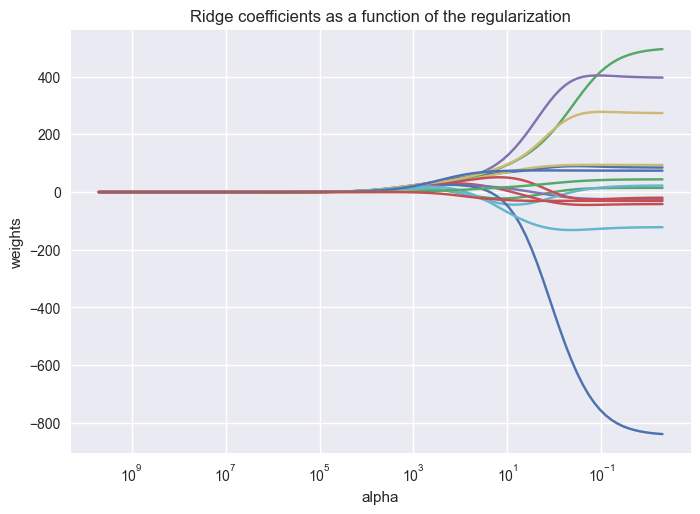

In [11]:
#Ridge Regression:
alphas = 10**np.linspace(10,-2,100)*0.5

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X_), y)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization');



### Simple Case Ridge Regression , alpha = 10^2

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_)

In [13]:
#This Code is a simple ridge regression where alpha = 10^2

ridge2 = Ridge(alpha=10**2)
ridge2.fit(scaler.transform(X_), y)
pred = ridge2.predict(scaler.transform(X_test))
mean_squared_error(y_test, pred)

print('Performance Metric:')
print(mean_squared_error(y_test, pred))

Performance Metric:
143320.31175572987


In [14]:
# Coeefficients obtained from Ridge Regression
pd.Series(ridge2.coef_.flatten(), index=X_.columns)

Hits       49.283242
HmRun      -4.374626
Runs       29.818855
RBI        24.354659
Walks      42.259607
Years      -2.727393
CAtBat     24.136622
CHits      44.443959
CHmRun     37.721847
CRuns      46.416418
CRBI       46.619066
CWalks      5.753438
PutOuts    57.940767
Assists     7.614890
Errors    -12.914156
dtype: float64

### Lasso Regression Variations

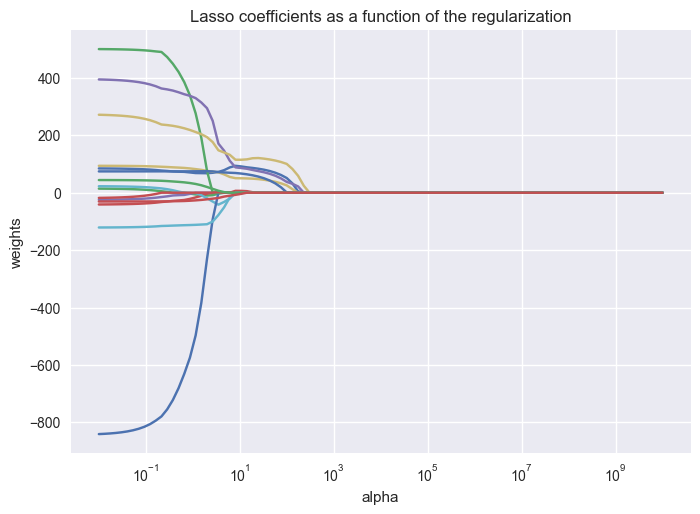

In [15]:
#Lasso Regression
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas*2:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_), y)
    coefs.append(lasso.coef_)

ax1 = plt.gca()
ax1.plot(alphas*2, coefs)
ax1.set_xscale('log')
ax1.set_xlim(ax.get_xlim()[::-1])  # unreverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization');

### Simple case Lasso Regression , alpha = 10^2

In [16]:
# Lasso Regression
scaler = StandardScaler().fit(X_train)

In [17]:
Lasso2 = Lasso(alpha=.001)
Lasso2.fit(scaler.transform(X_), y)
pred = Lasso2.predict(scaler.transform(X_test))
print('Performance Metric:')
print(mean_squared_error(y_test, pred))

Performance Metric:
129150.4368540245


C:\Users\Baron\Desktop\EE_257_Repo\EE_257\%ML_PATH_EE257%\EE257_env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.255e+07, tolerance: 5.332e+03
  model = cd_fast.enet_coordinate_descent(


In [18]:
# Coefficients obtained from Ridge
pd.Series(Lasso2.coef_.flatten(), index=X_.columns)

Hits        81.184046
HmRun       14.015049
Runs       -38.948165
RBI        -23.894139
Walks       90.861035
Years       23.678170
CAtBat    -873.541397
CHits      534.985932
CHmRun     -14.980504
CRuns      400.866469
CRBI       272.970723
CWalks    -119.700434
PutOuts     80.241783
Assists     43.409391
Errors     -29.570380
dtype: float64

### (iv) Obtain the results as a function of ElasticNet and ElasticNetCV, plot normalized coefficient wrt 
    The ElasticNet doesnt  have an attribute "lambda_best_", Only MSE error path and best alpha parameter

In [19]:
#Assert ElasticNet Regressor
grid = 10**np.linspace(10,-2,100)
lambda_best = skl_lm.ElasticNetCV(alphas=grid, copy_X=True, n_jobs = -1)
lambda_best.fit(X_, y)

C:\Users\Baron\Desktop\EE_257_Repo\EE_257\%ML_PATH_EE257%\EE257_env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8350.373756926507, tolerance: 4281.420206925509
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Baron\Desktop\EE_257_Repo\EE_257\%ML_PATH_EE257%\EE257_env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17144.219314638525, tolerance: 4281.420206925509
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Baron\Desktop\EE_257_Repo\EE_257\%ML_PATH_EE257%\EE257_env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21834.274863447994, tolerance: 4281.420206925509
  model = c

ElasticNetCV(alphas=array([1.00000000e+10, 7.56463328e+09, 5.72236766e+09, 4.32876128e+09,
       3.27454916e+09, 2.47707636e+09, 1.87381742e+09, 1.41747416e+09,
       1.07226722e+09, 8.11130831e+08, 6.13590727e+08, 4.64158883e+08,
       3.51119173e+08, 2.65608778e+08, 2.00923300e+08, 1.51991108e+08,
       1.14975700e+08, 8.69749003e+07, 6.57933225e+07, 4.97702356e+07,
       3.76493581e+07, 2.848035...
       6.13590727e+00, 4.64158883e+00, 3.51119173e+00, 2.65608778e+00,
       2.00923300e+00, 1.51991108e+00, 1.14975700e+00, 8.69749003e-01,
       6.57933225e-01, 4.97702356e-01, 3.76493581e-01, 2.84803587e-01,
       2.15443469e-01, 1.62975083e-01, 1.23284674e-01, 9.32603347e-02,
       7.05480231e-02, 5.33669923e-02, 4.03701726e-02, 3.05385551e-02,
       2.31012970e-02, 1.74752840e-02, 1.32194115e-02, 1.00000000e-02]),
             n_jobs=-1)

In [20]:
print('BEST ALPHA:')
lambda_best.alpha_

BEST ALPHA:


305.38555088334124

### Though the library does not have a function of "lambda" we can see the MSE graphs according to the alphas and choose a alpha accordingly. The Best alpha chosen in this situation is about 305

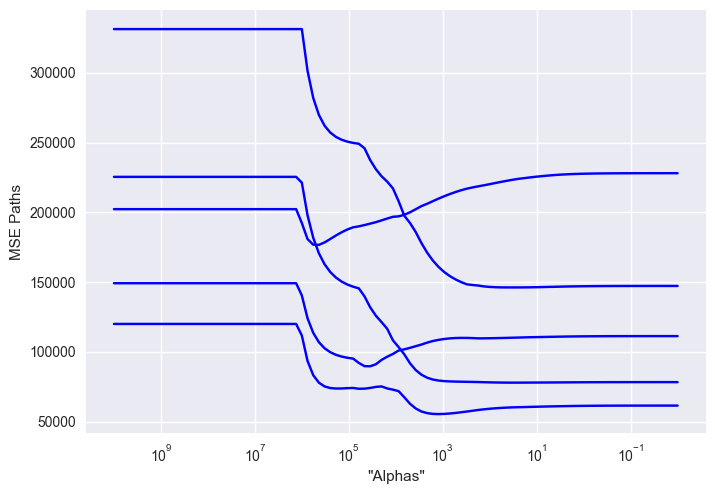

In [21]:
ax = plt.gca()
ax.plot(grid, lambda_best.mse_path_, color="blue")
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) 
plt.xlabel('"Alphas"')
plt.ylabel('MSE Paths')
plt.show()

In [22]:

#ElasticNet Non-CV
Elastic_lambda_best = skl_lm.ElasticNet(alpha=305, copy_X=True, warm_start = True)
Elastic_lambda_best.fit(X_, y)

pred = Elastic_lambda_best.predict(X_)
mean_squared_error(y, pred)

C:\Users\Baron\Desktop\EE_257_Repo\EE_257\%ML_PATH_EE257%\EE257_env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.411e+03, tolerance: 5.332e+03
  model = cd_fast.enet_coordinate_descent(


101928.34670048722

In [23]:
pd.Series(Elastic_lambda_best.coef_.flatten(), index = X_.columns)

Hits       1.244607
HmRun     -0.000000
Runs       0.143300
RBI        0.000000
Walks      1.718358
Years      0.000000
CAtBat    -0.355890
CHits      0.857594
CHmRun     0.000000
CRuns      0.902195
CRBI       0.695371
CWalks    -0.148558
PutOuts    0.274232
Assists    0.162945
Errors    -0.000000
dtype: float64